In [101]:
# Author: Karasukaigan
# Time: 2021/6/11
# GitHub: https://github.com/Karasukaigan

In [102]:
pip install opencv-python

In [103]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import random

In [104]:
def generate_gradient_image():

  image_size = [100, 100] #画像サイズを設定
  print("size: " + str(image_size[0]) + " × " + str(image_size[1]))

  thispixel = [0, 0, 0]
  thisline = []
  background = []

  #カラーをランダムに生成
  color_c1 = [random.randint(0,255), random.randint(0,255), random.randint(0,255)]
  color_c2 = [random.randint(0,255), random.randint(0,255), random.randint(0,255)]
  color_c3 = [random.randint(0,255), random.randint(0,255), random.randint(0,255)]
  color_c4 = [random.randint(0,255), random.randint(0,255), random.randint(0,255)]
  print("color: " + str(color_c1) + str(color_c2) + str(color_c3) + str(color_c4))

  #color_c1------color_c3
  #  |      |
  #  |      |
  #  |      |
  #color_c2------color_c4

  #カラー変化範囲計算
  color_range1 = [color_c2[0] - color_c1[0], color_c2[1] - color_c1[1], color_c2[2] - color_c1[2]]
  color_range2 = [color_c4[0] - color_c3[0], color_c4[1] - color_c3[1], color_c4[2] - color_c3[2]]
  print("range: [" + str(color_range1[0]) + ", " + str(color_range1[1]) + ", " + str(color_range1[2]) + "], [" + str(color_range2[0]) + ", " + str(color_range2[1]) + ", " + str(color_range2[2]) + "]")

  #ステップ計算
  step1 = [color_range1[0]/image_size[1], color_range1[1]/image_size[1], color_range1[2]/image_size[1]] 
  step2 = [color_range2[0]/image_size[1], color_range2[1]/image_size[1], color_range2[2]/image_size[1]] 
  print("step: [" + str(step1[0]) + ", " + str(step1[1]) + ", " + str(step1[2]) + "], [" + str(step2[0]) + ", " + str(step2[1]) + ", " + str(step2[2]) + "]")

  #各行の最初と最後にあるピクセルのカラーを計算
  color_startline = []
  color_endline = []
  now_color = [0, 0, 0]
  #行頭ピクセルカラー
  color_startline.append([color_c1[0],color_c1[1],color_c1[2]])
  now_color = [color_c1[0], color_c1[1], color_c1[2]]
  for i in range(image_size[1]-1):
    now_color = [now_color[0]+step1[0], now_color[1]+step1[1], now_color[2]+step1[2]]
    thispixel = [int(now_color[0]), int(now_color[1]), int(now_color[2])]
    color_startline.append([thispixel[0],thispixel[1],thispixel[2]])
  print("color_startline: " + str(color_startline))
  #行末ピクセルカラー
  color_endline.append([color_c3[0],color_c3[1],color_c3[2]])
  now_color = [color_c3[0], color_c3[1], color_c3[2]]
  for i in range(image_size[1]-1):
    now_color = [now_color[0]+step2[0], now_color[1]+step2[1], now_color[2]+step2[2]]
    thispixel = [int(now_color[0]), int(now_color[1]), int(now_color[2])]
    color_endline.append([thispixel[0],thispixel[1],thispixel[2]])
  print("color_endline: " + str(color_endline))

  #各行のカラーを計算
  color_range3 = [0, 0, 0]
  step3 = [0, 0, 0]
  for i in range(0,image_size[1]):
    color_range3 = [color_endline[i][0]-color_startline[i][0], color_endline[i][1]-color_startline[i][1], color_endline[i][2]-color_startline[i][2]]
    step3 = [color_range3[0]/image_size[0], color_range3[1]/image_size[0], color_range3[2]/image_size[0]]
    now_color = [color_startline[i][0], color_startline[i][1], color_startline[i][2]]
    for j in range(0,image_size[0]):
      thispixel = [int(now_color[0]), int(now_color[1]), int(now_color[2])]
      thisline.append([thispixel[0], thispixel[1], thispixel[2]])
      now_color = [now_color[0]+step3[0], now_color[1]+step3[1], now_color[2]+step3[2]]
    background.append(thisline) #画像データ
    thisline = []
  print("image_data: " + str(background))

  #画像データをnp.arrayに保存
  img = np.array(background, np.uint8) 

  return img

size: 100 × 100
color: [196, 238, 95][210, 206, 65][219, 99, 55][221, 94, 172]
range: [14, -32, -30], [2, -5, 117]
step: [0.14, -0.32, -0.3], [0.02, -0.05, 1.17]
color_startline: [[196, 238, 95], [196, 237, 94], [196, 237, 94], [196, 237, 94], [196, 236, 93], [196, 236, 93], [196, 236, 93], [196, 235, 92], [197, 235, 92], [197, 235, 92], [197, 234, 92], [197, 234, 91], [197, 234, 91], [197, 233, 91], [197, 233, 90], [198, 233, 90], [198, 232, 90], [198, 232, 89], [198, 232, 89], [198, 231, 89], [198, 231, 89], [198, 231, 88], [199, 230, 88], [199, 230, 88], [199, 230, 87], [199, 230, 87], [199, 229, 87], [199, 229, 86], [199, 229, 86], [200, 228, 86], [200, 228, 86], [200, 228, 85], [200, 227, 85], [200, 227, 85], [200, 227, 84], [200, 226, 84], [201, 226, 84], [201, 226, 83], [201, 225, 83], [201, 225, 83], [201, 225, 83], [201, 224, 82], [201, 224, 82], [202, 224, 82], [202, 223, 81], [202, 223, 81], [202, 223, 81], [202, 222, 80], [202, 222, 80], [202, 222, 80], [202, 222, 80], [203

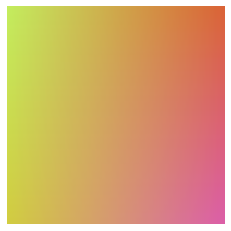

In [107]:
img = generate_gradient_image()

#画像表示、座標なし
plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

-----image_1-----
size: 100 × 100
color: [249, 82, 250][225, 89, 83][52, 31, 39][192, 71, 48]
range: [-24, 7, -167], [140, 40, 9]
step: [-0.24, 0.07, -1.67], [1.4, 0.4, 0.09]
color_startline: [[249, 82, 250], [248, 82, 248], [248, 82, 246], [248, 82, 244], [248, 82, 243], [247, 82, 241], [247, 82, 239], [247, 82, 238], [247, 82, 236], [246, 82, 234], [246, 82, 233], [246, 82, 231], [246, 82, 229], [245, 82, 228], [245, 82, 226], [245, 83, 224], [245, 83, 223], [244, 83, 221], [244, 83, 219], [244, 83, 218], [244, 83, 216], [243, 83, 214], [243, 83, 213], [243, 83, 211], [243, 83, 209], [242, 83, 208], [242, 83, 206], [242, 83, 204], [242, 83, 203], [242, 84, 201], [241, 84, 199], [241, 84, 198], [241, 84, 196], [241, 84, 194], [240, 84, 193], [240, 84, 191], [240, 84, 189], [240, 84, 188], [239, 84, 186], [239, 84, 184], [239, 84, 183], [239, 84, 181], [238, 84, 179], [238, 85, 178], [238, 85, 176], [238, 85, 174], [237, 85, 173], [237, 85, 171], [237, 85, 169], [237, 85, 168], [236, 8

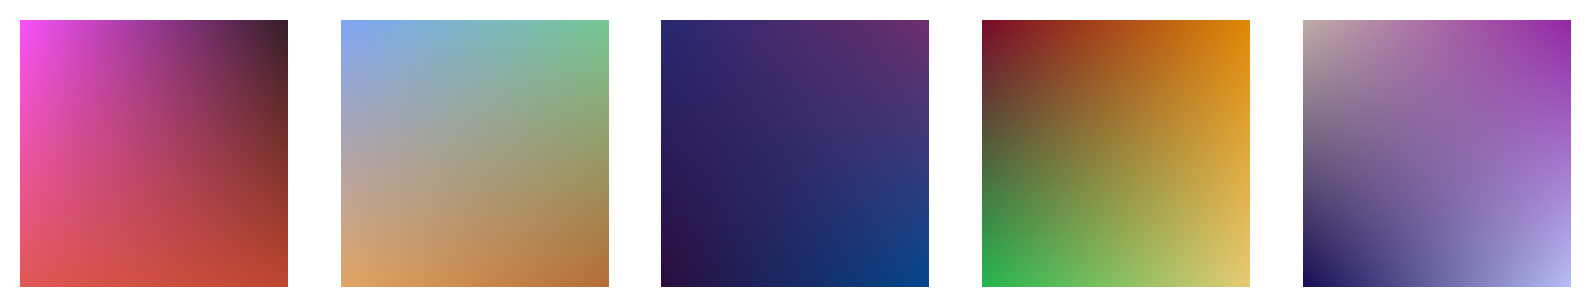

In [108]:
img_list = []
for i in range(5):
  print("-----image_" + str(i+1) + "-----")
  img_list.append(generate_gradient_image())
plt.figure(figsize=(10, 10),dpi=200)
for i in range(5):
  plt.subplot(1,5,i+1)
  plt.axis('off')
  plt.imshow(img_list[i])
plt.show()